# Análise de Dados da Universidade Federal do Rio Grande do Norte (UFRN)

Equipe: Henrique David de Medeiros (henriquemed101@gmail.com), Lucas Gabriel Matias Paiva (lucasgmpaiva1@gmail.com) e Robert Bleda de Saint George (saintgeorge@uol.com.br)

**1.0 - Objetivo**

   O Presente trabalho tem como objetivo fazer uma análise dos dados dos alunos matriculados no curso de Bacharelado de Tecnologia da Informação - BTI da Universidade Federal do Rio Grande do Norte, no período de 2014.1 a 2017.1. A partir dos dados disponibilizados pela universidade, está análise pretende mostrar o comportamento do perfil socioeconômico dos alunos, levando-se em conta a origem de suas formações anteriores à universidade, escola pública, particular ou mista, a faixa de renda declarada. Estabelecer um comparativo destes fatores com seus desempenhos universitários.
   
   Queremos verificar se estes fatores, de alguma forma, influenciam os rendimentos acadêmicos, e em caso positivo o tamanho deste impacto. Além disto pretendemos analisar a tendência do perfil socioeconômico num período fortemente impactante pelos fatos políticos que têm afetado o país.   
   
   
**2.0 - Metodologia**

**2.1 - Plataformas**

   As plataformas utilizadas foram o Anaconda navigator e o Jupyter Notebook, e as funções desenvolvidas em linguagem Python 3, com as bibliotecas numpy, pandas, matplotlib e seaborn.

In [62]:
#Bibliotecas Necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange

**2.2 - Dados**
   
   Os dados foram obtidos do site da UFRN http://dados.ufrn.br, onde foram baixados em cada período letivo de 2014.1 a 2017.1. As seguintes bases de dados, "dados socioeconômicos dos alunos","dados referente à matriculas em componentes curriculares", serviram de fonte para o estudo em questão. 
   
   O estudo separou as rendas declaradas no perfil socioeconômico em classes, visando comparar com a informação sobre a os alunos vindos de escolas públicas, particulares e mistas. Por fim analisou estes fatores em comparação com os desempenhos acadêmicos.
   
**3.0 - Manipulação dos Dados**

   Uma vez baixados, os dados foram manipulados de modo a que se obtivesse a informação desejada. Em cada célula abaixo está um comentário informando o andamento de cada fase do processo.
   
**3.1 - Leitura dos dados**

In [63]:
#Criando DataFrames/Importando os dados socioeconômico de cada discente.

dadosSocio_2017_1 = pd.read_csv("data/dados-socio-economicos-20171", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2016_2 = pd.read_csv("data/dados-socio-economicos-20162", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2016_1 = pd.read_csv("data/dados-socio-economicos-20161", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2015_2 = pd.read_csv("data/dados-socio-economicos-20152", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2015_1 = pd.read_csv("data/dados-socio-economicos-20151", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2014_2 = pd.read_csv("data/dados-socio-economicos-20142.csv", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2014_1 = pd.read_csv("data/dados-socio-economicos-20141.csv", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);


In [64]:
#Criando DataFrames/Importando os dados das situações de cada discente.

dadosSituacao_2017_1 = pd.read_csv("data/matricula-componente-20171", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2016_2 = pd.read_csv("data/matriculas-de-2016.2.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2016_1 = pd.read_csv("data/matriculas-de-2016.1.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2015_2 = pd.read_csv("data/matriculas-de-2015.2.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2015_1 = pd.read_csv("data/matriculas-de-2015.1.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2014_2 = pd.read_csv("data/matricula-componente-20142.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2014_1 = pd.read_csv("data/matricula-componente-20141.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);

**3.2 - Preparação dos dados socioeconômicos**

In [65]:
#Criando tabela base
lista_Socio = [dadosSocio_2014_1, dadosSocio_2014_2, dadosSocio_2015_1, dadosSocio_2015_2, dadosSocio_2016_1, dadosSocio_2016_2, dadosSocio_2017_1]

#Renomeando as tabelas.
for data in lista_Socio:
    data.rename(columns={"id_discente" : "discente"}, inplace=True)

In [66]:
# Obtendo dados da situação acadêmicas apenas dos discentes do IMD.

dadosSituacao_2017_1 = dadosSituacao_2017_1[dadosSituacao_2017_1.id_curso==92127264]
dadosSituacao_2016_2 = dadosSituacao_2016_2[dadosSituacao_2016_2.id_curso==92127264]
dadosSituacao_2016_1 = dadosSituacao_2016_1[dadosSituacao_2016_1.id_curso==92127264]
dadosSituacao_2015_2 = dadosSituacao_2015_2[dadosSituacao_2015_2.id_curso==92127264]
dadosSituacao_2015_1 = dadosSituacao_2015_1[dadosSituacao_2015_1.id_curso==92127264]
dadosSituacao_2014_2 = dadosSituacao_2014_2[dadosSituacao_2014_2.id_curso==92127264]
dadosSituacao_2014_1 = dadosSituacao_2014_1[dadosSituacao_2014_1.id_curso==92127264]

In [67]:
#Unindo Dados De Cada Período

dados_2017_1 = pd.merge(dadosSocio_2017_1, dadosSituacao_2017_1, on='discente')
dados_2016_2 = pd.merge(dadosSocio_2016_2, dadosSituacao_2016_2, on='discente')
dados_2016_1 = pd.merge(dadosSocio_2016_1, dadosSituacao_2016_1, on='discente')
dados_2015_2 = pd.merge(dadosSocio_2015_2, dadosSituacao_2015_2, on='discente')
dados_2015_1 = pd.merge(dadosSocio_2015_1, dadosSituacao_2015_1, on='discente')
dados_2014_2 = pd.merge(dadosSocio_2014_2, dadosSituacao_2014_2, on='discente')
dados_2014_1 = pd.merge(dadosSocio_2014_1, dadosSituacao_2014_1, on='discente')

dados_2017_1 = dados_2017_1[~dados_2017_1.discente.duplicated()]
dados_2016_2 = dados_2016_2[~dados_2016_2.discente.duplicated()]
dados_2016_1 = dados_2016_1[~dados_2016_1.discente.duplicated()]
dados_2015_2 = dados_2015_2[~dados_2015_2.discente.duplicated()]
dados_2015_1 = dados_2015_1[~dados_2015_1.discente.duplicated()]
dados_2014_2 = dados_2014_2[~dados_2014_2.discente.duplicated()]
dados_2014_1 = dados_2014_1[~dados_2014_1.discente.duplicated()]

lista_Dados = [dados_2014_1, dados_2014_2, dados_2015_1, dados_2015_2, dados_2016_1, dados_2016_2, dados_2017_1]

# Eliminando dados repetidos
for data in lista_Dados:
  data.dropna()
  
# Reindexando os dados.
dados_2017_1.reset_index(drop=True, inplace=True)
dados_2016_2.reset_index(drop=True, inplace=True)
dados_2016_1.reset_index(drop=True, inplace=True)
dados_2015_2.reset_index(drop=True, inplace=True)
dados_2015_1.reset_index(drop=True, inplace=True)
dados_2014_2.reset_index(drop=True, inplace=True)
dados_2014_1.reset_index(drop=True, inplace=True)

In [68]:
# Atribuindo a cada discente uma classe

dados_gerais = [dados_2014_1, dados_2014_2, dados_2015_1, dados_2015_2, dados_2016_1, dados_2016_2, dados_2017_1]

for i in dados_gerais:
    i["classe"] = pd.cut(i["renda"],
       bins=[714,1024,1541,2565,4418,8418,12926, 27500],
      labels=["D","C2","C1","B2","B1","A2", "A1"],
      include_lowest=True)
    
# Classe A1 < 27500
# Classe A2 < 12926
# Classe B1 < 8418
# Classe B2 < 4415
# Classe C1 < 2565
# Classe C2 < 1024
# Classe D < 714

**3.3 - Preparação dos dados referentes às escolas de origem**

In [69]:
# Separando os dados por tipo de escola.
dados_escola_publica_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola publica ']
dados_escola_privada_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola particular ']

dados_escola_publica_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola publica ']
dados_escola_privada_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola particular ']

dados_escola_publica_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola publica ']
dados_escola_privada_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola particular ']

dados_escola_publica_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola publica ']
dados_escola_privada_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola particular ']

dados_escola_publica_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola publica ']
dados_escola_privada_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola particular ']

dados_escola_publica_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola publica ']
dados_escola_privada_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola particular ']

dados_escola_publica_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola publica ']
dados_escola_privada_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola particular ']

In [70]:
#Preparando a tabela por classe e perído
classes = dados_2017_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes.columns = ['20171']
classes["20162"] = dados_2016_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20161"] = dados_2016_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20152"] = dados_2015_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20151"] = dados_2015_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20142"] = dados_2014_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20141"] = dados_2014_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')

# Troca linhas com colunas.
classes = classes.transpose()

In [71]:
#Classificando por tipo de escola e perído
dados_2017_1
classe_escola = pd.DataFrame( columns=['escola_ens_medio','20171', '20161','20162','20151', '20152', '20141', '20142'])
classe_escola['escola_ens_medio'] = ['Todo em escola publica ', 'Todo em escola privada ', 'Parte em escola pública parte em escola particular ', 'Em escola Particular, com bolsa ', 'Outro tipo de escola ']
total = dados_2017_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20171'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2016_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20162'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2016_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20161'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2016_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20162'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2015_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20152'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2015_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20151'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2014_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20142'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2014_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20141'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']


In [72]:
# Transpondo a tabela
# Elimina a tabela escola_ens_medio
classe_escola = classe_escola.drop(columns='escola_ens_medio')

# Troca linhas com colunas
classe_escola = classe_escola.T

# Renomeia as colunas
classe_escola.columns = ['Todo em escola publica ', 'Todo em escola privada ', 'Parte em escola pública parte em escola particular ', 'Em escola Particular, com bolsa ', 'Outro tipo de escola ']

# Reindexa o DataFrame
class_school = classe_escola.reset_index()

**3.4 - Preparação dos dados referentes ao desempenho**

In [73]:
#Preparando os dados referente ao desempenho dos alunos por tipo de escola
todoEscolaPublica_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2016_1 = todoEscolaPublica_2016_1[~todoEscolaPublica_2016_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2016_1 = todoEscolaPublica_2016_1.to_frame().reset_index()

todoEscolaPublica_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2016_2 = todoEscolaPublica_2016_2[~todoEscolaPublica_2016_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2016_2 = todoEscolaPublica_2016_2.to_frame().reset_index()

todoEscolaPublica_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2017_1 = todoEscolaPublica_2017_1[~todoEscolaPublica_2017_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2017_1 = todoEscolaPublica_2017_1.to_frame().reset_index()

todoEscolaPublica_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2015_2 = todoEscolaPublica_2015_2[~todoEscolaPublica_2015_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2015_2 = todoEscolaPublica_2015_2.to_frame().reset_index()

todoEscolaPublica_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2015_1 = todoEscolaPublica_2015_1[~todoEscolaPublica_2015_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2015_1 = todoEscolaPublica_2015_1.to_frame().reset_index()

todoEscolaPublica_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2014_2 = todoEscolaPublica_2014_2[~todoEscolaPublica_2014_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2014_2 = todoEscolaPublica_2014_2.to_frame().reset_index()

todoEscolaPublica_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2014_1 = todoEscolaPublica_2014_1[~todoEscolaPublica_2014_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2014_1 = todoEscolaPublica_2014_1.to_frame().reset_index()

# Escola Privada

todoEscolaPrivada_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2016_1 = todoEscolaPrivada_2016_1[~todoEscolaPrivada_2016_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2016_1 = todoEscolaPrivada_2016_1.to_frame().reset_index()

todoEscolaPrivada_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2016_2 = todoEscolaPrivada_2016_2[~todoEscolaPrivada_2016_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2016_2 = todoEscolaPrivada_2016_2.to_frame().reset_index()

todoEscolaPrivada_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2017_1 = todoEscolaPrivada_2017_1[~todoEscolaPrivada_2017_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2017_1 = todoEscolaPrivada_2017_1.to_frame().reset_index()

todoEscolaPrivada_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2015_2 = todoEscolaPrivada_2015_2[~todoEscolaPrivada_2015_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2015_2 = todoEscolaPrivada_2015_2.to_frame().reset_index()

todoEscolaPrivada_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2015_1 = todoEscolaPrivada_2015_1[~todoEscolaPrivada_2015_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2015_1 = todoEscolaPrivada_2015_1.to_frame().reset_index()

todoEscolaPrivada_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2014_2 = todoEscolaPrivada_2014_2[~todoEscolaPrivada_2014_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2014_2 = todoEscolaPrivada_2014_2.to_frame().reset_index()

todoEscolaPrivada_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2014_1 = todoEscolaPrivada_2014_1[~todoEscolaPrivada_2014_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2014_1 = todoEscolaPrivada_2014_1.to_frame().reset_index()

# Metade em Escola Pública e metade em Escola Privada.

middle_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2016_1 = middle_2016_1[~middle_2016_1.discente.duplicated()].descricao.value_counts()
middle_2016_1 = middle_2016_1.to_frame().reset_index()

middle_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2016_2 = middle_2016_2[~middle_2016_2.discente.duplicated()].descricao.value_counts()
middle_2016_2 = middle_2016_2.to_frame().reset_index()

middle_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2017_1 = middle_2017_1[~middle_2017_1.discente.duplicated()].descricao.value_counts()
middle_2017_1 = middle_2017_1.to_frame().reset_index()

middle_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2015_2 = middle_2015_2[~middle_2015_2.discente.duplicated()].descricao.value_counts()
middle_2015_2 = middle_2015_2.to_frame().reset_index()

middle_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2015_1 = middle_2015_1[~middle_2015_1.discente.duplicated()].descricao.value_counts()
middle_2015_1 = middle_2015_1.to_frame().reset_index()

middle_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2014_2 = middle_2014_2[~middle_2014_2.discente.duplicated()].descricao.value_counts()
middle_2014_2 = middle_2014_2.to_frame().reset_index()

middle_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2014_1 = middle_2014_1[~middle_2014_1.discente.duplicated()].descricao.value_counts()
middle_2014_1 = middle_2014_1.to_frame().reset_index()

# Em Escola Particular, com bolsa


bolsa_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2016_1 = bolsa_2016_1[~bolsa_2016_1.discente.duplicated()].descricao.value_counts()
bolsa_2016_1 = bolsa_2016_1.to_frame().reset_index()

bolsa_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2016_2 = bolsa_2016_2[~bolsa_2016_2.discente.duplicated()].descricao.value_counts()
bolsa_2016_2 = bolsa_2016_2.to_frame().reset_index()

bolsa_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2017_1 = bolsa_2017_1[~bolsa_2017_1.discente.duplicated()].descricao.value_counts()
bolsa_2017_1 = bolsa_2017_1.to_frame().reset_index()

bolsa_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2015_2 = bolsa_2015_2[~bolsa_2015_2.discente.duplicated()].descricao.value_counts()
bolsa_2015_2 = bolsa_2015_2.to_frame().reset_index()

bolsa_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2015_1 = bolsa_2015_1[~bolsa_2015_1.discente.duplicated()].descricao.value_counts()
bolsa_2015_1 = bolsa_2015_1.to_frame().reset_index()

bolsa_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2014_2 = bolsa_2014_2[~bolsa_2014_2.discente.duplicated()].descricao.value_counts()
bolsa_2014_2 = bolsa_2014_2.to_frame().reset_index()

bolsa_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2014_1 = bolsa_2014_1[~bolsa_2014_1.discente.duplicated()].descricao.value_counts()
bolsa_2014_1 = bolsa_2014_1.to_frame().reset_index()

# Outro tipo de escola.

other_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Outro tipo de escola ']
other_2016_1 = other_2016_1[~other_2016_1.discente.duplicated()].descricao.value_counts()
other_2016_1 = other_2016_1.to_frame().reset_index()

other_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Outro tipo de escola ']
other_2016_2 = other_2016_2[~other_2016_2.discente.duplicated()].descricao.value_counts()
other_2016_2 = other_2016_2.to_frame().reset_index()

other_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Outro tipo de escola ']
other_2017_1 = other_2017_1[~other_2017_1.discente.duplicated()].descricao.value_counts()
other_2017_1 = other_2017_1.to_frame().reset_index()

other_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Outro tipo de escola ']
other_2015_2 = other_2015_2[~other_2015_2.discente.duplicated()].descricao.value_counts()
other_2015_2 = other_2015_2.to_frame().reset_index()

other_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Outro tipo de escola ']
other_2015_1 = other_2015_1[~other_2015_1.discente.duplicated()].descricao.value_counts()
other_2015_1 = other_2015_1.to_frame().reset_index()

other_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Outro tipo de escola ']
other_2014_2 = other_2014_2[~other_2014_2.discente.duplicated()].descricao.value_counts()
other_2014_2 = other_2014_2.to_frame().reset_index()

other_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Outro tipo de escola ']
other_2014_1 = other_2014_1[~other_2014_1.discente.duplicated()].descricao.value_counts()
other_2014_1 = other_2014_1.to_frame().reset_index()

In [74]:
# Construindo uma tabela default para receber dados por merge.
col_default = ['APROVADO', 'APROVADO POR NOTA','EXCLUIDA','DESISTENCIA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
rows_default = [0,0,0,0,0,0,0,0,0]
tab_default = pd.DataFrame( columns=['index'], data=col_default)

#for i in tab_default['index']:
#    tab_default['2014_1'] = 0
#    tab_default['2014_2'] = 0
#    tab_default['2015_1'] = 0
#    tab_default['2015_2'] = 0
#    tab_default['2016_1'] = 0
#    tab_default['2016_2'] = 0
#    tab_default['2017_1'] = 0
#tab_default

In [75]:
# Dados referentes à escola pública
# Junta todos os perídos da escola pública
all_public_school = pd.merge(tab_default, todoEscolaPublica_2014_1, on='index', how='right').fillna(0)
all_public_school =  pd.merge(all_public_school, todoEscolaPublica_2014_2, on='index', how='right').fillna(0)
all_public_school.columns = ['index', '2014_1', '2014_2']
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2015_1, on='index', how='right').fillna(0)
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2015_2, on='index', how='right').fillna(0)
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2016_1, on='index', how='right').fillna(0)
all_public_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2016_2, on='index', how='right').fillna(0)
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2017_1, on='index', how='right').fillna(0)
all_public_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']
all_public_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,26.0,8.0,17.0,29.0,36.0,84.0,70
1,APROVADO POR NOTA,18.0,11.0,16.0,33.0,43.0,44.0,69
2,TRANCADO,3.0,1.0,4.0,5.0,4.0,11.0,2
3,CANCELADO,3.0,2.0,4.0,6.0,15.0,17.0,33
4,INDEFERIDO,2.0,1.0,1.0,12.0,7.0,14.0,18
5,REPROVADO,2.0,4.0,6.0,9.0,29.0,7.0,13
6,REPROVADO POR MÉDIA E POR FALTAS,1.0,6.0,3.0,7.0,12.0,11.0,13
7,DESISTENCIA,0.0,0.0,0.0,3.0,3.0,6.0,4
8,EXCLUIDA,0.0,0.0,0.0,0.0,0.0,0.0,9


In [76]:
# Dados referentes à escola privada
# Junta todos os dados das escola privadas por período
all_private_school = pd.merge(tab_default, todoEscolaPrivada_2014_1, on='index', how='right').fillna(0)
all_private_school =  pd.merge(all_private_school, todoEscolaPrivada_2014_2, on='index', how='right').fillna(0)
all_private_school.columns = ['index', '2014_1', '2014_2']
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2015_1, on='index', how='right').fillna(0)
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2015_2, on='index', how='right').fillna(0)
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2016_1, on='index', how='right').fillna(0)
all_private_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2016_2, on='index', how='right').fillna(0)
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2017_1, on='index', how='right').fillna(0)
all_private_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']
all_private_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,9.0,8.0,5.0,22.0,14.0,28.0,34
1,APROVADO POR NOTA,16.0,10.0,5.0,16.0,27.0,15.0,20
2,TRANCADO,2.0,2.0,1.0,4.0,2.0,1.0,1
3,REPROVADO,6.0,4.0,2.0,1.0,10.0,7.0,11
4,REPROVADO POR MÉDIA E POR FALTAS,2.0,2.0,1.0,4.0,5.0,6.0,9
5,DESISTENCIA,0.0,0.0,3.0,1.0,2.0,3.0,8
6,CANCELADO,0.0,0.0,2.0,2.0,10.0,11.0,7
7,INDEFERIDO,0.0,0.0,0.0,8.0,2.0,5.0,8
8,EXCLUIDA,0.0,0.0,0.0,0.0,0.0,0.0,5


In [77]:
# Dados referentes à escola parte pública parte privada.
# Junta os dados
middle_school = pd.merge(tab_default, middle_2014_1, on='index', how='left').fillna(0)
middle_school =  pd.merge(middle_school, middle_2014_2, on='index', how='left').fillna(0)
middle_school.columns = ['index', '2014_1', '2014_2']
middle_school = pd.merge(middle_school, middle_2015_1, on='index', how='left').fillna(0)
middle_school = pd.merge(middle_school, middle_2015_2, on='index', how='left').fillna(0)
middle_school = pd.merge(middle_school, middle_2016_1, on='index', how='left').fillna(0)
middle_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
middle_school = pd.merge(middle_school, middle_2016_2, on='index', how='left').fillna(0)
middle_school = pd.merge(middle_school, middle_2017_1, on='index', how='left').fillna(0)
middle_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']
middle_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,1.0,1.0,2.0,1.0,2.0,4.0,1.0
1,APROVADO POR NOTA,4.0,3.0,0.0,3.0,3.0,3.0,6.0
2,EXCLUIDA,2.0,2.0,5.0,0.0,0.0,0.0,0.0
3,DESISTENCIA,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,TRANCADO,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,CANCELADO,2.0,0.0,0.0,0.0,1.0,2.0,0.0
6,INDEFERIDO,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,REPROVADO,0.0,1.0,0.0,2.0,1.0,2.0,2.0
8,REPROVADO POR MÉDIA E POR FALTAS,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
#Dados referentes à escola privada com bolsa.
#Junta os dados
bolsa_school = pd.merge(tab_default, bolsa_2014_1, on='index', how='left').fillna(0)
bolsa_school =  pd.merge(bolsa_school, bolsa_2014_2, on='index', how='left').fillna(0)
bolsa_school.columns = ['index', '2014_1', '2014_2']
bolsa_school = pd.merge(bolsa_school, bolsa_2015_1, on='index', how='left').fillna(0)
bolsa_school = pd.merge(bolsa_school, bolsa_2015_2, on='index', how='left').fillna(0)
bolsa_school = pd.merge(bolsa_school, bolsa_2016_1, on='index', how='left').fillna(0)
bolsa_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
bolsa_school = pd.merge(bolsa_school, bolsa_2016_2, on='index', how='left').fillna(0)
bolsa_school = pd.merge(bolsa_school, bolsa_2017_1, on='index', how='left').fillna(0)
bolsa_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']
bolsa_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,1.0,1.0,3.0,2.0,2.0,5.0,4.0
1,APROVADO POR NOTA,1.0,1.0,1.0,5.0,7.0,3.0,6.0
2,EXCLUIDA,0.0,2.0,2.0,0.0,0.0,0.0,0.0
3,DESISTENCIA,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANCADO,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,CANCELADO,1.0,0.0,0.0,0.0,0.0,2.0,2.0
6,INDEFERIDO,0.0,0.0,0.0,0.0,2.0,2.0,1.0
7,REPROVADO,0.0,0.0,0.0,2.0,1.0,0.0,0.0
8,REPROVADO POR MÉDIA E POR FALTAS,0.0,0.0,0.0,1.0,2.0,1.0,0.0


In [79]:
#Dados referentes à outras escolas.
#Junta os dados
other_school = pd.merge(tab_default, other_2014_1, on='index', how='left').fillna(0)
other_school =  pd.merge(other_school, other_2014_2, on='index', how='left').fillna(0)
other_school.columns = ['index', '2014_1', '2014_2']
other_school = pd.merge(other_school, other_2015_1, on='index', how='left').fillna(0)
other_school = pd.merge(other_school, other_2015_2, on='index', how='left').fillna(0)
other_school = pd.merge(other_school, other_2016_1, on='index', how='left').fillna(0)
other_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
other_school = pd.merge(other_school, other_2016_2, on='index', how='left').fillna(0)
other_school = pd.merge(other_school, other_2017_1, on='index', how='left').fillna(0)
other_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']
other_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,APROVADO POR NOTA,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,EXCLUIDA,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,DESISTENCIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRANCADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CANCELADO,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,INDEFERIDO,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,REPROVADO,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,REPROVADO POR MÉDIA E POR FALTAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# Rendimento acadêmico dos alunos vindos de escola pública
all_public_school = all_public_school.T
all_public_school.drop(all_public_school.index[0], inplace=True)
all_public_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'EXCLUIDA','DESISTENCIA','TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
all_public_school = all_public_school.reset_index()
all_public_school.head()

,index,APROVADO,APROVADO POR NOTA,EXCLUIDA,DESISTENCIA,TRANCADO,CANCELADO,INDEFERIDO,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
0,2014_1,26,18,3,3,2,2,1,0,0
1,2014_2,8,11,1,2,1,4,6,0,0
2,2015_1,17,16,4,4,1,6,3,0,0
3,2015_2,29,33,5,6,12,9,7,3,0
4,2016_1,36,43,4,15,7,29,12,3,0


In [81]:
# Rendimento acadêmico dos alunos vindos de escola privada
all_private_school = all_private_school.T
all_private_school.drop(all_private_school.index[0], inplace=True)
all_private_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'EXCLUIDA','DESISTENCIA','TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
all_private_school = all_private_school.reset_index()
all_private_school

,index,APROVADO,APROVADO POR NOTA,EXCLUIDA,DESISTENCIA,TRANCADO,CANCELADO,INDEFERIDO,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
0,2014_1,9,16,2,6,2,0,0,0,0
1,2014_2,8,10,2,4,2,0,0,0,0
2,2015_1,5,5,1,2,1,3,2,0,0
3,2015_2,22,16,4,1,4,1,2,8,0
4,2016_1,14,27,2,10,5,2,10,2,0
5,2016_2,28,15,1,7,6,3,11,5,0
6,2017_1,34,20,1,11,9,8,7,8,5


In [82]:
# Rendimento acadêmico dos alunos vindos de escola parte pública parte privada.
middle_school = middle_school.T
middle_school.drop(middle_school.index[0], inplace=True)
middle_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'EXCLUIDA','DESISTENCIA','TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
middle_school = middle_school.reset_index()
middle_school

,index,APROVADO,APROVADO POR NOTA,EXCLUIDA,DESISTENCIA,TRANCADO,CANCELADO,INDEFERIDO,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
0,2014_1,1,4,2,1,0,2,0,0,0
1,2014_2,1,3,2,0,0,0,0,1,0
2,2015_1,2,0,5,0,0,0,0,0,0
3,2015_2,1,3,0,1,0,0,0,2,1
4,2016_1,2,3,0,0,0,1,1,1,0
5,2016_2,4,3,0,1,1,2,1,2,0
6,2017_1,1,6,0,1,0,0,0,2,0


In [83]:
# Rendimento acadêmico dos alunos vindos de escola privada com bolsa
bolsa_school = bolsa_school.T
bolsa_school.drop(bolsa_school.index[0], inplace=True)
bolsa_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'EXCLUIDA','DESISTENCIA','TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
bolsa_school = bolsa_school.reset_index()
bolsa_school

,index,APROVADO,APROVADO POR NOTA,EXCLUIDA,DESISTENCIA,TRANCADO,CANCELADO,INDEFERIDO,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
0,2014_1,1,1,0,1,0,1,0,0,0
1,2014_2,1,1,2,0,0,0,0,0,0
2,2015_1,3,1,2,0,0,0,0,0,0
3,2015_2,2,5,0,0,1,0,0,2,1
4,2016_1,2,7,0,0,1,0,2,1,2
5,2016_2,5,3,0,1,0,2,2,0,1
6,2017_1,4,6,0,0,0,2,1,0,0


In [84]:
# Rendimento acadêmico dos alunos vindos de outras escolas.
other_school = other_school.T
other_school.drop(other_school.index[0], inplace=True)
other_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'EXCLUIDA','DESISTENCIA','TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
other_school = other_school.reset_index()
other_school

,index,APROVADO,APROVADO POR NOTA,EXCLUIDA,DESISTENCIA,TRANCADO,CANCELADO,INDEFERIDO,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
0,2014_1,0,0,0,0,0,0,0,0,0
1,2014_2,0,0,0,0,0,0,0,0,0
2,2015_1,0,0,0,0,0,0,0,0,0
3,2015_2,0,1,0,0,0,0,0,0,0
4,2016_1,0,0,0,0,0,1,0,1,0
5,2016_2,0,1,0,0,0,0,0,0,0
6,2017_1,0,1,1,0,0,0,0,0,0


In [85]:
# Dados referentes apenas a situação de aprovação ou reprovação por tipo de escola
all_public_school["Aprovados"] = all_public_school["APROVADO"] + all_public_school["APROVADO POR NOTA"]
all_public_school["Reprovados"] = all_public_school["REPROVADO"] + all_public_school["REPROVADO POR MÉDIA E POR FALTAS"]

all_private_school["Aprovados"] = all_private_school["APROVADO"] + all_private_school["APROVADO POR NOTA"]
all_private_school["Reprovados"] = all_private_school["REPROVADO"] + all_private_school["REPROVADO POR MÉDIA E POR FALTAS"]

middle_school["Aprovados"] = middle_school["APROVADO"] #+ middle_school["APROVADO POR NOTA"]
middle_school["Reprovados"] = middle_school["REPROVADO"] + middle_school["REPROVADO POR MÉDIA E POR FALTAS"]

bolsa_school["Aprovados"] = bolsa_school["APROVADO"] + bolsa_school["APROVADO POR NOTA"]
bolsa_school["Reprovados"] = bolsa_school["REPROVADO"] + bolsa_school["REPROVADO POR MÉDIA E POR FALTAS"]

other_school["Aprovados"] = other_school["APROVADO"] + other_school["APROVADO POR NOTA"]
other_school["Reprovados"] = other_school["REPROVADO"] + other_school["REPROVADO POR MÉDIA E POR FALTAS"]

In [86]:
# Dados referentes a classes escola pública x privada
dados_escola_2017_1_classe = dados_escola_privada_2017_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2017_1_classe.columns = ['privada']
dados_escola_2017_1_classe['publica'] = dados_escola_publica_2017_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2017_1_classe

dados_escola_2016_2_classe = dados_escola_privada_2016_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2016_2_classe.columns = ['privada']
dados_escola_2016_2_classe['publica'] = dados_escola_publica_2016_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2016_2_classe

dados_escola_2016_1_classe = dados_escola_privada_2016_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2016_1_classe.columns = ['privada']
dados_escola_2016_1_classe['publica'] = dados_escola_publica_2016_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2016_1_classe

dados_escola_2015_2_classe = dados_escola_privada_2015_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2015_2_classe.columns = ['privada']
dados_escola_2015_2_classe['publica'] = dados_escola_publica_2015_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2015_2_classe

dados_escola_2015_1_classe = dados_escola_privada_2015_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2015_1_classe.columns = ['privada']
dados_escola_2015_1_classe['publica'] = dados_escola_publica_2015_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2015_1_classe

dados_escola_2014_2_classe = dados_escola_privada_2014_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2014_2_classe.columns = ['privada']
dados_escola_2014_2_classe['publica'] = dados_escola_publica_2014_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2014_2_classe

dados_escola_2014_1_classe = dados_escola_privada_2014_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2014_1_classe.columns = ['privada']
dados_escola_2014_1_classe['publica'] = dados_escola_publica_2014_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2014_1_classe

dados_escola_2017_1_classe = dados_escola_2017_1_classe.reset_index()
dados_escola_2016_2_classe = dados_escola_2016_2_classe.reset_index()
dados_escola_2016_1_classe = dados_escola_2016_1_classe.reset_index()
dados_escola_2015_2_classe = dados_escola_2015_2_classe.reset_index()
dados_escola_2015_1_classe = dados_escola_2015_1_classe.reset_index()
dados_escola_2014_2_classe = dados_escola_2014_2_classe.reset_index()
dados_escola_2014_1_classe = dados_escola_2014_1_classe.reset_index()


**4.0 - Analise dos Dados**

**4.1 - Situação Socieconômica**
   
   As classes socioecnômicas foram divididas de acordo com visão do Instituto Brasileiro de Geografia e Estatística - IBGE, conforme o valor declarado em reais (R$), e ficaram como abaixo:
   
    Classe A1 < 27500
    Classe A2 < 12926
    Classe B1 < 8418
    Classe B2 < 4415
    Classe C1 < 2565
    Classe C2 < 1024
    Classe D < 714
   
   O gráfico 1 mostra o comportamento das classes ao longo do período. Podemos facilmente identificar que as classes "C" e "D" representam o grosso dos nossos alunos matriculados, também podemos ver que a classe "A" tem menor representação.
   
   Observamos ainda que a partir de 2014 tivemos um crescimento expressivo nos quantitativos dos alunos matriculados em quase todas as classes, exceto a classe "A" que oscilou de forma quase estável. Este crescimento pode ter sido influenciado pela consolidação do SISU - Sistema de Seleção Unificada, que foi criado em 2009, mas somente em 2013 foi adotado pela UFRN, mas principalmente pelo início da criação do curso de BTI em 2013, foco do nosso estudo.
   
   A classe "B", entre 2014.2 e 2015.1, apresentou um momento de declínio, mas já em 2015.2 voltou a crescer e se manteve em crescimento. É possível inferir que estes patamares tendam a se estabilizarem nos próximos anos, ou até apresentarem declínio nas classes de menor renda, pois mudanças nos cenários políticos normalmente afetam a educação. Governos de ideologia direita tendem a investir pouco em escola pública afetando diretamente as classe "C" e "D".

In [87]:
classes

classe,D,C2,C1,B2,B1,A2,A1
20171,53,69,83,64,50,9,7
20162,44,55,75,51,37,15,1
20161,43,40,67,48,26,16,1
20152,32,28,49,28,19,11,3
20151,16,23,37,22,9,7,4
20142,19,16,28,16,13,3,0
20141,16,26,27,20,21,4,1


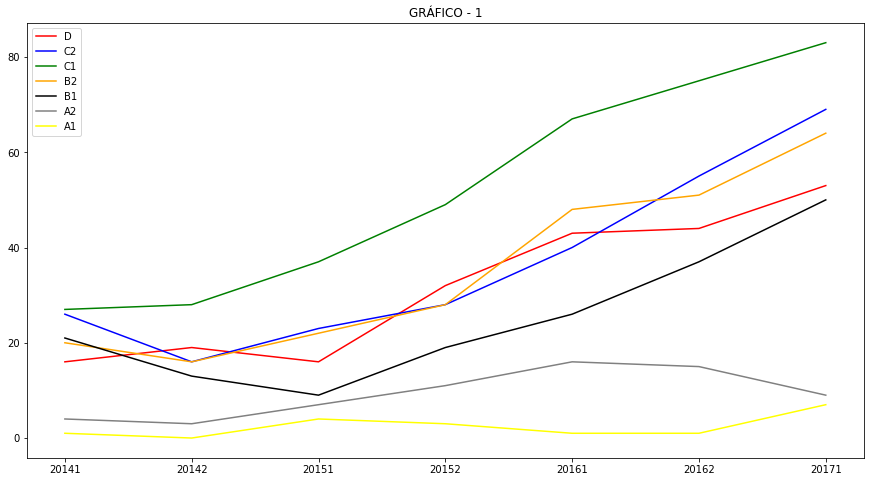

In [88]:
# Geração de gráfico mostrando a quantidade de classes sociais na UFRN com o passar dos anos.
fig, axies12 = plt.subplots(figsize=(15,8))
colors = ['red', 'blue', 'green', 'orange', 'black', 'grey', 'yellow']
for i in range(7):
    start_index = 0;
    end_index = 7;
    subset = classes[start_index:end_index]
    axies12 = plt.plot(subset[classes.columns[i]], c=colors[i])
plt.title("GRÁFICO - 1")
plt.legend(loc='upper left')
plt.show()

**4.2 - Origem escolar anterior à universidade**
   
   O gráfico 2 mostra a composição das matrículas dos alunos a partir dos tipos de escola das quais vieram. Ao longo do tempo é possível claramente distinguir a predominância de alunos oriundos de escola pública. Em contrapartida alunos vindo das demais escolas representam juntas em torno de 10% daqueles de escola pública.
   
   Este fato entra em perfeita consonância com os dados mostrados no gráfico 1, onde os alunos de baixa renda também são maioria. Isso mostra que independente da renda familiar, da origem escolar, o acesso à universidade pública e gratuita é mérito apenas do aluno. Isso cria oportunidades para aqueles que desde cedo tiveram que lutar com muita dificuldade para concluir os estudos. Agora disputando o mercado de trabalho com mais possibilidades, pois uma formação superior representa um diferencial. 

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Período')

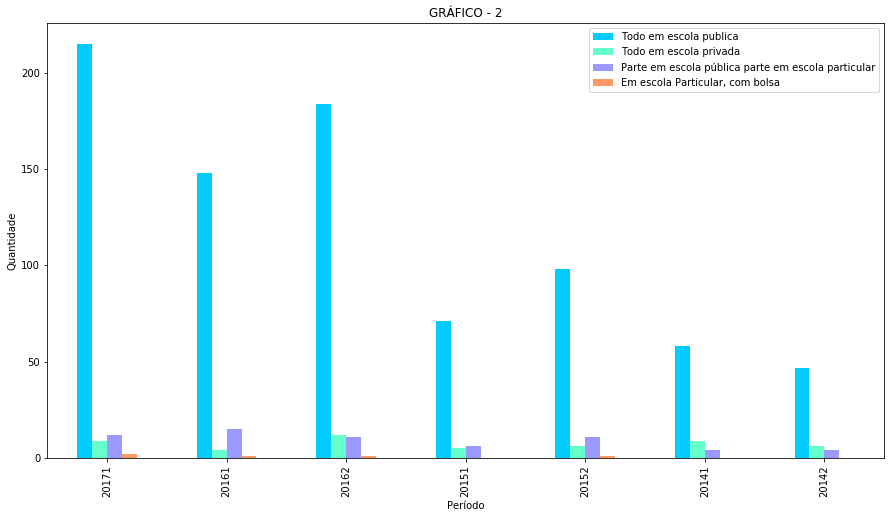

In [89]:
cor1 = (0/255, 204/255, 255/255); cor2 = (102/255, 255/255, 204/255); cor3 = (153/255, 153/255, 255/255)
cor4 = (255/255, 153/255, 102/255); cor5 = (255/255, 102/255, 204/255)

%matplotlib inline
axe = class_school.plot(kind='bar',x='index',y=['Todo em escola publica ','Todo em escola privada ','Parte em escola pública parte em escola particular ', 'Em escola Particular, com bolsa '],
                   title='GRÁFICO - 2',
                   color=[cor1,cor2,cor3,cor4,cor5], figsize=(15,8), linewidth=4)
axe.legend(loc='best', labels=['Todo em escola publica','Todo em escola privada', 'Parte em escola pública parte em escola particular', 'Em escola Particular, com bolsa'])
axe.set_ylabel('Quantidade')
axe.set_xlabel('Período')

**4.3 - Comparativo classe de renda x Origem escolar**
   
   O gráfico 3 mostra um comparativo entre os quantitativos de alunos oriundos da escola pública e escola privada, levando-se em conta as suas faixas de renda ao longo do período.
   
   Pode-se observar que nas faixas de renda "B1" e "B2" encontra-se em torno de 50% para cada grupo de origem pública e privada ao logo de quase todos os períodos. A partir deste ponto bem central aos gráficos para a direita em direção a faixa "A1" os quantitativos de alunos da escola privada superam os quantitativos de alunos da escola pública. Para esquerda em direção a faixa "D" acontece o oposto.

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


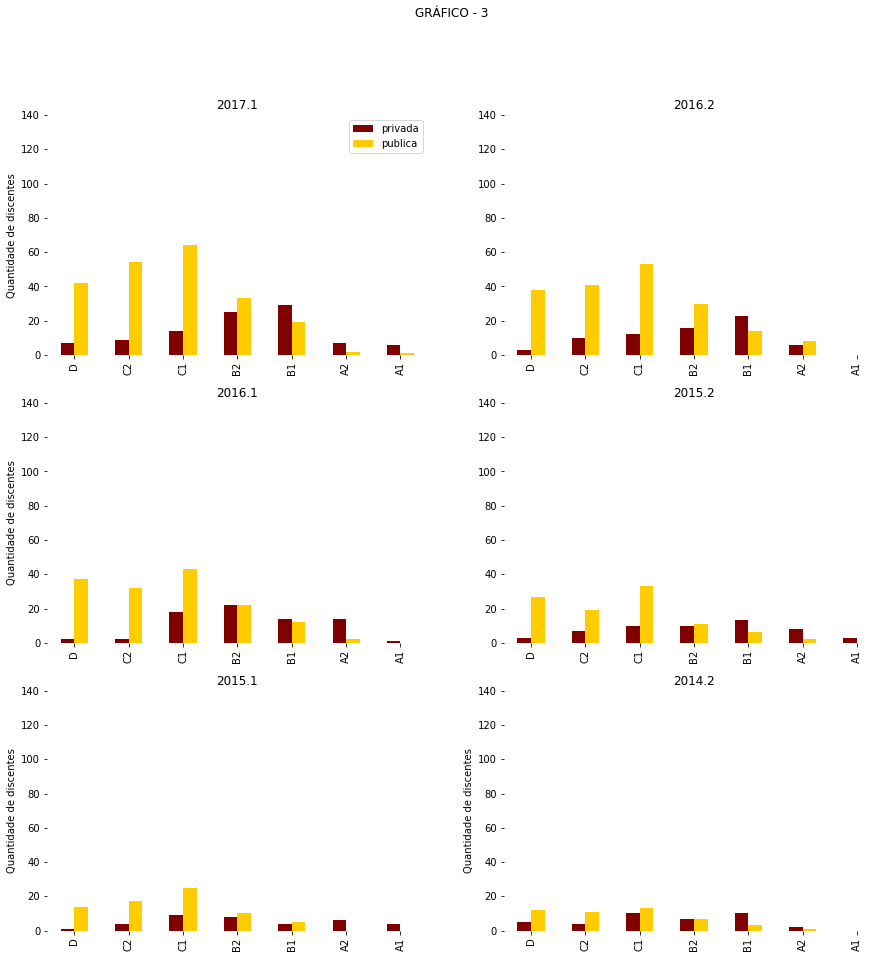

In [90]:
fig_situacao, axies = plt.subplots( ncols=2, nrows=3, figsize=(15,15))
#Cores
cor1 = (128/255,0/255,0/255)
cor2 = (255/255,204/255,0/255)
cor3 = (255/255,51/255,0/255)
cor4 = (102/255,153/255,0/255)
cor5 = (0/255,204/255,153/255)
cor6 = (0/255,153/255,255/255)
cor7 = (51/255,51/255,204/255)
cor8 = (153/255,51/255,255/255)
cor9 = (204/255,0/255,204/255)
def cleanPosicoes():
    posicoes = ['left','right','bottom', 'top']
    for i in range(0,4):
        ax.spines[posicoes[i]].set_visible(False)
ax = dados_escola_2017_1_classe.plot( kind='bar', x ='classe', y = ['privada','publica'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='2017.1', ax = axies[0,0])
ax.set_xlabel("")
ax.set_ylim([0,140])
ax.set_ylabel("Quantidade de discentes")
cleanPosicoes()
ax = dados_escola_2016_2_classe.plot( kind='bar', x ='classe', y = ['privada','publica'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='2016.2', ax = axies[0,1], legend= False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_ylim([0, 140])
cleanPosicoes()
ax = dados_escola_2016_1_classe.plot( kind='bar', x ='classe', y = ['privada','publica'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='2016.1', ax = axies[1,0], legend= False)

ax.set_xlabel("")
ax.set_ylabel("Quantidade de discentes")
ax.set_ylim([0, 140])
cleanPosicoes()
ax = dados_escola_2015_2_classe.plot( kind='bar', x ='classe', y = ['privada','publica'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='2015.2', ax = axies[1,1], legend= False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_ylim([0, 140])
cleanPosicoes()
ax = dados_escola_2015_1_classe.plot( kind='bar', x ='classe', y = ['privada','publica'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='2015.1', ax = axies[2,0], legend= False)
ax.set_xlabel("")
ax.set_ylabel("Quantidade de discentes")
ax.set_ylim([0, 140])
cleanPosicoes()
ax = dados_escola_2014_2_classe.plot( kind='bar', x ='classe', y = ['privada','publica'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='2014.2', ax = axies[2,1], legend= False)

ax.set_xlabel("")
ax.set_ylabel("Quantidade de discentes")
ax.set_ylim([0, 140])
cleanPosicoes()
fig_situacao.subplots_adjust(hspace = 0.2)
fig_situacao.suptitle("GRÁFICO - 3")
plt.show()

**4.4 - Desempenho acadêmico**
   
   Com base no gráfico 2 selecionamos para estudo do desempenho acadêmico os alunos originados da escola pública, privada e que tiveram formação parte em cada uma das duas. Por terem os dados mais relevantes separamos cada um em um gráfico próprio.
   
**4.4.1 - Escola pública**
   
   O gráfico 4 mostra o desempenho dos alunos vindos de escola pública, podemos notar que as colunas que representam "aprovação", ao longo do tempo, indicam boa superioridade sobre as que representam "reprovação". Isto sugere um bom desempenho nessa categoria de alunos.
   
   Outro fato que chama a atenção são as colunas que representam "cancelamento" e " reprovação por média e por falta", em 2016.1 estes valores quase se equivaleram aos "aprovados". As "desistências" apresentam crescimento ao longo do período, talvez fosse importante entender o fenômeno.
   

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


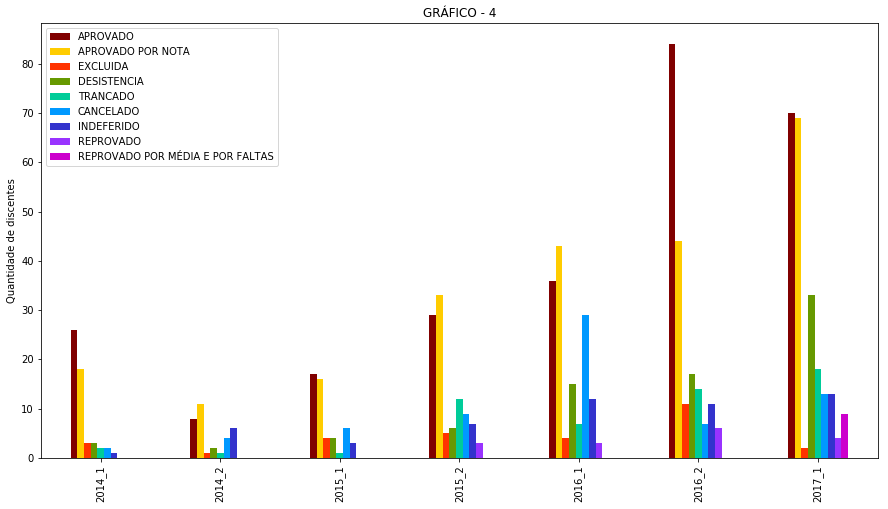

In [91]:
%matplotlib inline
axe = all_public_school.plot( kind='bar', x ='index', y = ['APROVADO', 'APROVADO POR NOTA','EXCLUIDA','DESISTENCIA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9],figsize=(15,8), linewidth=4, 
              title='GRÁFICO - 4', legend= True)
axe.set_xlabel("")
axe.set_ylabel("Quantidade de discentes")
plt.show()

**4.4.2 - Escola Parte Pública e Parte Privada**
   
   O gráfico 5 mostra o desempenho dos alunos que tiveram formação parte em escola pública e parte em escola privada, por se tratar de poucos alunos, consideramos a amostra insuficiente para avaliar o desempenho. Contudo os dados indicam que "aprovam" mais que "reprovam".   

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


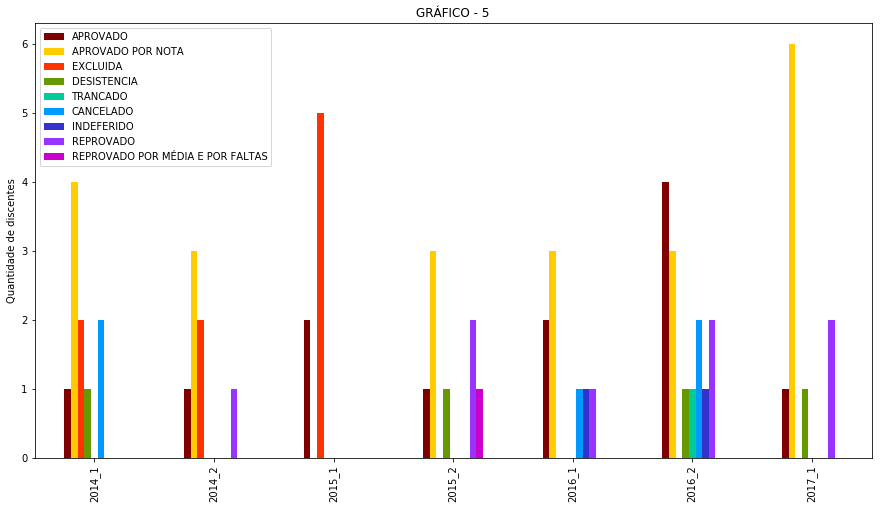

In [92]:
%matplotlib inline
axe = middle_school.plot( kind='bar', x ='index', y = ['APROVADO', 'APROVADO POR NOTA','EXCLUIDA','DESISTENCIA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9],figsize=(15,8), linewidth=4, 
              title='GRÁFICO - 5', legend= True)
axe.set_xlabel("")
axe.set_ylabel("Quantidade de discentes")
plt.show()

**4.4.3 - Escola privada**
   
  O gráfico 6 mostra o desempenho dos alunos vindos de escola privada, podemos notar que as colunas que representam "aprovação", ao longo do tempo, indicam boa superioridade sobre as que representam "reprovação". Isto sugere um bom desempenho nessa categoria de alunos.
  
  Observamos também que "cancelamento" e "trancamento" são menores proporcionamente que outras categorias de alunos, ainda que tenha havido crescimento em 2017.1, este foi proporcional.

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


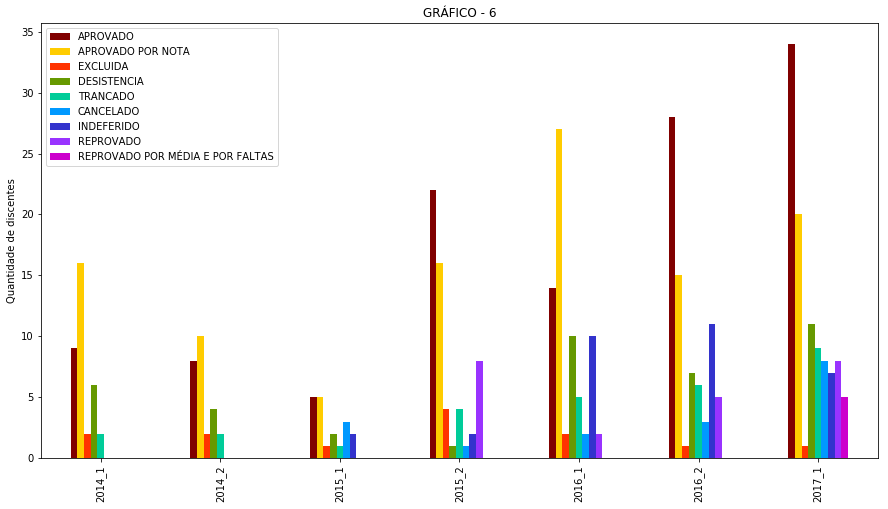

In [93]:
%matplotlib inline
axe = all_private_school.plot( kind='bar', x ='index', y = ['APROVADO', 'APROVADO POR NOTA','EXCLUIDA','DESISTENCIA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9],figsize=(15,8), linewidth=4, 
              title='GRÁFICO - 6', legend= True)
axe.set_xlabel("")
axe.set_ylabel("Quantidade de discentes")
plt.show()

**4.4.4 - Aprovação x Reprovação**
   
  O gráfico 7 ilustra melhor o que foi dito anteriormente. As linhas acompanham o crescimento mostrado no gráfico 1, entretanto é possível observar que no caso dos alunos vindos de escola pública, o crescimento do número de alunos também acompanha o crescimento de alunos "aprovados", o que gera um gap positivo entre "aprovados" e "reprovados". Isto sugere melhoria no rendimento acadêmico destes alunos.
  
  Para os alunos oriundos de escola privada este gap ficou estável acompanhando o crescimento, que é suave. Nos demais os dados são de pouca relevância.

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


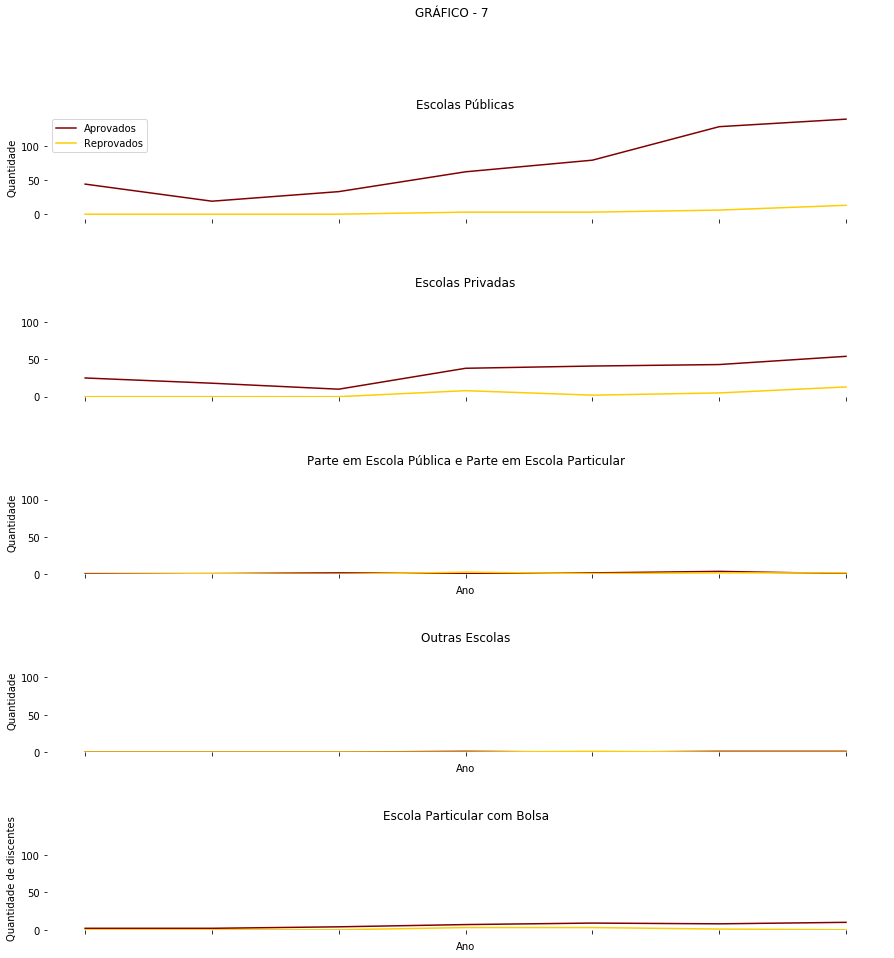

In [94]:
fig_situacao, axies = plt.subplots( ncols=1, nrows=5, figsize=(15,15))
def cleanPosicoes():
    posicoes = ['left','right','bottom', 'top']
    for i in range(0,4):
        ax.spines[posicoes[i]].set_visible(False)
ax = all_public_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados' ], 
              color=[cor1,cor2], 
              title='Escolas Públicas', ax = axies[0])
ax.set_xlabel("")
ax.set_ylabel("Quantidade")
cleanPosicoes()
ax = all_private_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados' ], 
              color=[cor1,cor2], 
              title='Escolas Privadas', ax = axies[1], legend= False)
ax.set_xlabel("")
ax.set_ylim([0, 140])
cleanPosicoes()
ax = middle_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados'], 
              color=[cor1,cor2], 
              title='Parte em Escola Pública e Parte em Escola Particular', ax = axies[2], legend= False)
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.set_ylim([0, 140])
cleanPosicoes()
ax = other_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados'], 
              color=[cor1,cor2], 
              title='Outras Escolas', ax = axies[3], legend= False)
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.set_ylim([0, 140])
cleanPosicoes()
ax = bolsa_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados'], 
              color=[cor1,cor2], 
              title='Escola Particular com Bolsa', ax = axies[4], legend= False)
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade de discentes")
ax.set_ylim([0, 140])
cleanPosicoes()
fig_situacao.subplots_adjust(hspace = 0.7)
fig_situacao.suptitle("GRÁFICO - 7")
plt.show()

**5.0 - Conclusões**
   
  Os dados mostraram que ao longo do período avaliado houve um crescimento expressivo no quantitativo de alunos matriculados. A ração mais plausível é que o período estudado coincide em parte com a criação do curso Bacharelado em Tecnologia da Informação - BTI, que é o foco do nosso estudo. De fato, no início haviam menos alunos.
  
  Os dados também revelaram que a ampla maioria dos alunos matriculados são originados de escola pública e também pertencem às faixas de rendas mais modestas. Fatos que estão intimamente ligados pois o modelo de distribuição de renda em nosso país conduz os alunos mais pobres à buscarem o ensino público e gratuito.
  Podemos ver este fato no outro viés do gráfico constatando que os alunos oriundos de escola privada pertencem à melhores classes de renda e são minoria.
  
  Com relação ao desempenho acadêmico os dados mostraram que não existem diferenças significativas entre os alunos originados de escolas públicas ou privadas. Fato que mostra que de certa forma a universidade nivela os alunos independente de suas origens.